# Movimento uniformemente acelerado

Este notebook simula um problema inverso linear que estima posição inicial, a velocidade inicial e a aceleração da gravidade de um corpo em movimento uniformemente acelerado. Consideramos que o movimento deste corpo é somente na vertical, e a única força que age sobre ele é a força peso. 

## Importando as bibliotecas 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Gerando os pontos nos quais as medidas são efetuadas

In [2]:
t = np.linspace(0.,20.,num=200) # em segundos

In [3]:
t

array([ 0.        ,  0.10050251,  0.20100503,  0.30150754,  0.40201005,
        0.50251256,  0.60301508,  0.70351759,  0.8040201 ,  0.90452261,
        1.00502513,  1.10552764,  1.20603015,  1.30653266,  1.40703518,
        1.50753769,  1.6080402 ,  1.70854271,  1.80904523,  1.90954774,
        2.01005025,  2.11055276,  2.21105528,  2.31155779,  2.4120603 ,
        2.51256281,  2.61306533,  2.71356784,  2.81407035,  2.91457286,
        3.01507538,  3.11557789,  3.2160804 ,  3.31658291,  3.41708543,
        3.51758794,  3.61809045,  3.71859296,  3.81909548,  3.91959799,
        4.0201005 ,  4.12060302,  4.22110553,  4.32160804,  4.42211055,
        4.52261307,  4.62311558,  4.72361809,  4.8241206 ,  4.92462312,
        5.02512563,  5.12562814,  5.22613065,  5.32663317,  5.42713568,
        5.52763819,  5.6281407 ,  5.72864322,  5.82914573,  5.92964824,
        6.03015075,  6.13065327,  6.23115578,  6.33165829,  6.4321608 ,
        6.53266332,  6.63316583,  6.73366834,  6.83417085,  6.93

## Velocidade inicial e a aceleração da gravidade

In [4]:
g = -9.8

In [5]:
V0 = 100.

In [6]:
S0 = 20.

In [7]:
p_true = np.array([S0,V0,g])

### Cálculo das posições verdadeiras segundo a equação horária

In [8]:
S = S0 + V0*t + 0.5*g*t*t

#### Gerando dados com ruído aleatórios

In [9]:
np.random.seed(40)
mu, std = 0., 10.
r = np.random.normal(mu,std,t.size)

In [10]:
S_obs = S + r

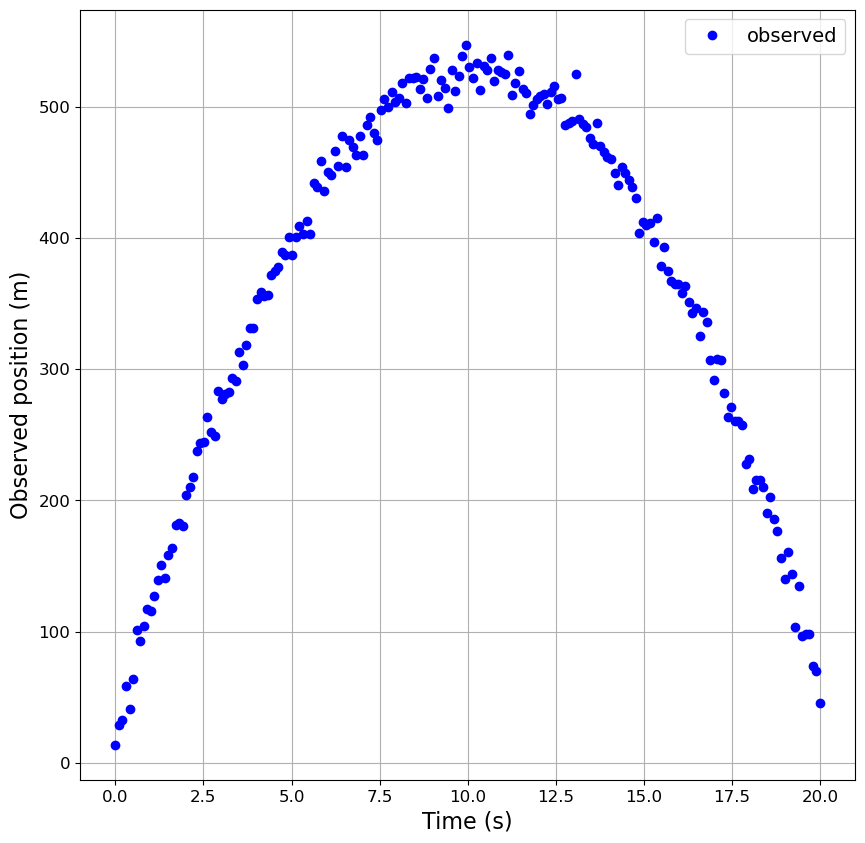

In [11]:
plt.figure(figsize=(10,10))
plt.plot(t, S_obs, 'bo', label = 'observed')
plt.legend(loc = 'best', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Time (s)', fontsize = 16)
plt.ylabel('Observed position (m)', fontsize = 16)
plt.grid()
plt.show()

## Resolvendo o problema inverso

### Matriz de sensibilidade

In [12]:
G = np.empty((t.size,p_true.size))

In [13]:
G[:,0] = np.ones_like(t)
G[:,1] = t
G[:,2] = 0.5*t*t

In [14]:
G

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00502513e-01, 5.05037752e-03],
       [1.00000000e+00, 2.01005025e-01, 2.02015101e-02],
       [1.00000000e+00, 3.01507538e-01, 4.54533976e-02],
       [1.00000000e+00, 4.02010050e-01, 8.08060403e-02],
       [1.00000000e+00, 5.02512563e-01, 1.26259438e-01],
       [1.00000000e+00, 6.03015075e-01, 1.81813591e-01],
       [1.00000000e+00, 7.03517588e-01, 2.47468498e-01],
       [1.00000000e+00, 8.04020101e-01, 3.23224161e-01],
       [1.00000000e+00, 9.04522613e-01, 4.09080579e-01],
       [1.00000000e+00, 1.00502513e+00, 5.05037752e-01],
       [1.00000000e+00, 1.10552764e+00, 6.11095679e-01],
       [1.00000000e+00, 1.20603015e+00, 7.27254362e-01],
       [1.00000000e+00, 1.30653266e+00, 8.53513800e-01],
       [1.00000000e+00, 1.40703518e+00, 9.89873993e-01],
       [1.00000000e+00, 1.50753769e+00, 1.13633494e+00],
       [1.00000000e+00, 1.60804020e+00, 1.29289664e+00],
       [1.00000000e+00, 1.70854

### Resolvendo o sistema linear

In [15]:
def L2_norm(A,d):
    At = A.T
    AtA = np.dot(At,A)
    Atd = np.dot(At,d)
    m = np.linalg.solve(AtA,Atd)
    return m 

In [16]:
p_est = L2_norm(G,S_obs)

In [17]:
S_pred = np.dot(G,p_est)

## Visualizando o resultado

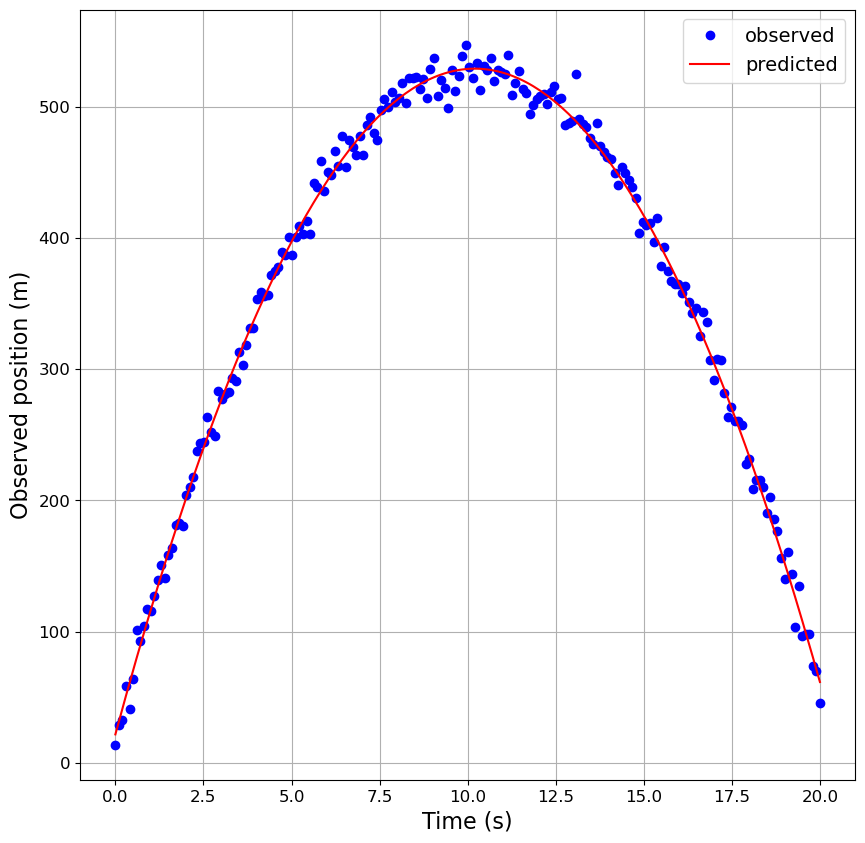

In [18]:
plt.figure(figsize=(10,10))
plt.plot(t, S_obs, 'bo', label = 'observed')
plt.plot(t, S_pred, 'r-', label = 'predicted')
plt.legend(loc = 'best', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Time (s)', fontsize = 16)
plt.ylabel('Observed position (m)', fontsize = 16)
plt.grid()
plt.show()

### Comparação entre estimado e verdadeiro

In [19]:
print (p_true)
print (p_est)

[ 20.  100.   -9.8]
[21.79443562 99.37512149 -9.73800567]
